<a href="https://colab.research.google.com/github/irisawa/TF2.0-Alpha/blob/master/Textclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-alpha0

In [12]:
from __future__ import absolute_import, division, print_function

!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.0.0-alpha0


# IMDB datasetのロード

In [0]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [14]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [15]:
print(train_data.shape)

(25000,)


In [16]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [17]:
len(train_data[0]), len(train_data[1]), len(train_data[2]),len(train_data[3])

(218, 189, 141, 550)

# 整数を単語に戻す

In [0]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [20]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

# 前処理

データの長さが異なるため`pad_sequences`で調整する。

- value: 浮動小数点数．パディングする値．
- padding: 文字列，'pre'または'post'．各シーケンスの前後どちらを埋めるか．
- maxlen: 整数，シーケンスの最大長．


In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [23]:
len(train_data[0]), len(train_data[1]), len(train_data[2]),len(train_data[3])

(256, 256, 256, 256)

In [24]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

# モデルの構築

## Embedding層
正の整数を固定次元の密ベクトルに変換する。<br>
指定された次元への埋め込みベクトルを生成してくれる。例え語彙数が10000であっても、次元数を16と指定すれば、16次元の実数ベクトルが生成される。ベクトルの各要素はランダムに決定され、当然ながらone-hotベクトルではない。

## プーリング層（GlobalAveragePooling1D層）
次に、GlobalAveragePooling1Dレイヤーは、シーケンスの次元を平均化することによって、各例の固定長出力ベクトルを返します。これにより、モデルは可能な限り簡単な方法で可変長の入力を処理できる。

- GlobalAveragePooling1D：時系列データのためのグローバルな平均プーリング演算．

## Dense層（１）
この固定長出力ベクトルは、16の隠れユニットを持つ完全に接続された（密）レイヤーを介してパイプ処理される。

## Dense層（２）
最後の層は、単一の出力ノードと密接に接続されている。シグモイド活性化関数を使用すると、この値は0から1の間の浮動小数点数であり、確率を表す。

In [25]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


## 隠れ層について
出力数（ユニット、ノード、またはニューロン）は、レイヤの表現空間の次元です。言い換えれば、内部表現を学習するときにネットワークが許容する自由度。

モデルに隠れた単位やレイヤーがある場合、ネットワークはより複雑な表現を学ぶことができる。ただし、ネットワークの計算コストが高くなり、不要なパターン、つまりトレーニングデータのパフォーマンスは向上するがテストデータのパフォーマンスは向上しないパターンの学習につながる可能性がある。これは過剰適合と呼ばれている。


# 損失関数とOptimizer

今回のモデルは確率（シグモイド活性化を含む単一層）を出力するので、binary_crossentropy loss関数を使用する。

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 検証

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

### トレーニングデータ

512サンプルのミニバッチで40エポックのモデルを学習させる。これは、x_trainテンソルとy_trainテンソルのすべてのサンプルで40回の反復させる。トレーニング中に、検証セットからの10,000サンプルについてモデルの損失と精度を監視する。

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 87us/sample - loss: 0.6924 - accuracy: 0.5047 - val_loss: 0.6913 - val_accuracy: 0.5001
Epoch 2/40
15000/15000 [==============================] - 1s 65us/sample - loss: 0.6879 - accuracy: 0.6533 - val_loss: 0.6844 - val_accuracy: 0.6924
Epoch 3/40
15000/15000 [==============================] - 1s 63us/sample - loss: 0.6771 - accuracy: 0.7197 - val_loss: 0.6705 - val_accuracy: 0.7417
Epoch 4/40
15000/15000 [==============================] - 1s 64us/sample - loss: 0.6572 - accuracy: 0.7398 - val_loss: 0.6469 - val_accuracy: 0.7536
Epoch 5/40
15000/15000 [==============================] - 1s 64us/sample - loss: 0.6259 - accuracy: 0.7802 - val_loss: 0.6136 - val_accuracy: 0.7771
Epoch 6/40
15000/15000 [==============================] - 1s 64us/sample - loss: 0.5851 - accuracy: 0.8046 - val_loss: 0.5738 - val_accuracy: 0.7958
Epoch 7/40
15000/15000 [==============================] 

# モデルの評価

In [29]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 41us/sample - loss: 0.3317 - accuracy: 0.8717
[0.33165484661102296, 0.87168]


今回のアプローチは、約87％の精度を達成した。

# 損失と精度のグラフ

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

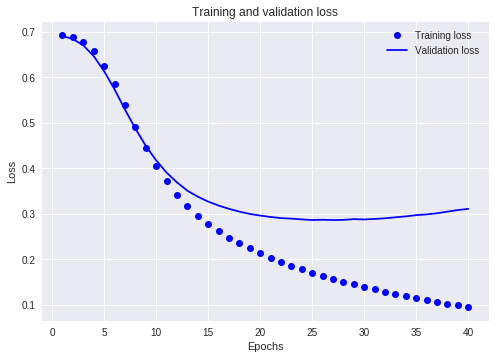

In [31]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

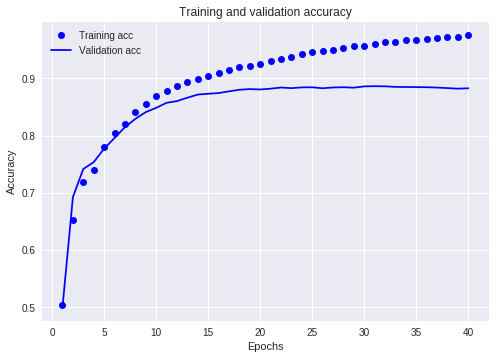

In [32]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()